DATA LOADING

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
dataset = pd.read_csv('movie_rating.csv', encoding = 'latin')
print(dataset.shape)
print(dataset.info())

(15509, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [26]:
print(dataset.duplicated().sum())

6


In [27]:
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [28]:
dataset.drop_duplicates().shape

(15503, 10)

In [29]:
dataset['Genre'] = dataset['Genre'].fillna(dataset['Genre'].mode()[0])


In [30]:
dataset.dropna(subset=['Actor 1','Actor 2', 'Actor 3'], inplace = True)

In [31]:
dataset = dataset.fillna(dataset['Rating'].mean())
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,5.815602,5.815602,Drama,5.815602,5.815602,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",5.815602,5.815602,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,5.815602,5.815602,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [44]:
dataset['Actor'] = dataset['Actor 1'] +', ' + dataset['Actor 2'] + ', ' + dataset['Actor 3']
dataset.drop(columns = ['Actor 1','Actor 2', 'Actor 3'])
print(dataset.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
Actor       0
dtype: int64


In [33]:
x = dataset[['Name','Genre','Director','Actor']]
y = dataset['Rating']

ENCODING AND SPLIT THE DATA

In [34]:
from sklearn.preprocessing import LabelEncoder
lbg = LabelEncoder()
lba = LabelEncoder()
lbd = LabelEncoder()
x.loc[:,'Genre'] = lbg.fit_transform(x['Genre'])
x.loc[:,'Actor'] = lba.fit_transform(x['Actor'])
x.loc[:,'Director'] = lbd.fit_transform(x['Director'])
x.loc[:,'Name'] = lbd.fit_transform(x['Name'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 22)
print(x_train.shape)
print(x_test.shape)

(9892, 4)
(2473, 4)


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


print(x_test)

[[-0.96836535 -0.37370956 -1.46706392 -1.43286119]
 [ 1.26683643 -1.65830295  1.61006561  0.72786939]
 [ 1.17614066 -1.65830295  0.86857992  1.42065275]
 ...
 [-1.57413877  0.77061214 -0.8259351  -0.88347048]
 [-1.14511375 -1.51803126 -1.40136265 -1.54869996]
 [-0.14776988  0.82229119 -1.71470714 -0.3495437 ]]


['Genre', 'Director', 'Actor']


<Axes: >

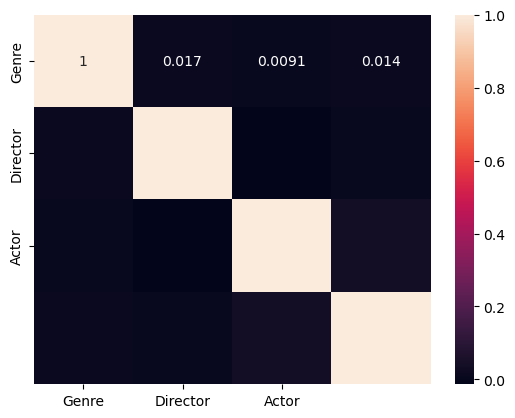

In [36]:
corr = x.corr()
x = dataset[['Genre', 'Director', 'Actor']]
print(x.columns.tolist())
sns.heatmap(corr, annot = True, xticklabels=x.columns, yticklabels=x.columns)

In [37]:
x = dataset[['Genre', 'Director', 'Actor']]
x_train = pd.DataFrame(x_train)
x_train

,0,1,2,3
0,-1.387701,-1.419475,-0.584852,1.404688
1,-1.540991,-0.352081,-1.252753,-0.244538
2,1.606421,1.458807,1.462109,0.600278
3,0.427577,0.391414,0.606520,0.670560
4,1.090386,-1.029324,0.025864,0.241750
...,...,...,...,...
9887,0.125962,0.391414,0.525140,1.482369
9888,-0.200168,1.525059,0.414434,-0.082916
9889,0.661546,0.391414,0.389507,0.249433
9890,0.022010,-1.419475,0.925441,1.328430


In [38]:
x_test = pd.DataFrame(x_test)
y_test.head()

3281     3.900000
13408    5.900000
12988    5.815602
10965    5.900000
3553     6.500000
Name: Rating, dtype: float64

BUILD THE MODELS

In [39]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
models = {
    'svr':SVR(),
    'rfr':RandomForestRegressor(),
    'lr':LinearRegression(),
    'knr':KNeighborsRegressor()}

outcome = []

for name,i in models.items():
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    outcome.append({'Model': name,'r2':r2, 'mse':mse})

outcomes = pd.DataFrame(outcome)   
outcomes

,Model,r2,mse
0,svr,0.029988,1.143537
1,rfr,-0.211508,1.428234
2,lr,0.011693,1.165104
3,knr,-0.121696,1.322355


<BarContainer object of 4 artists>

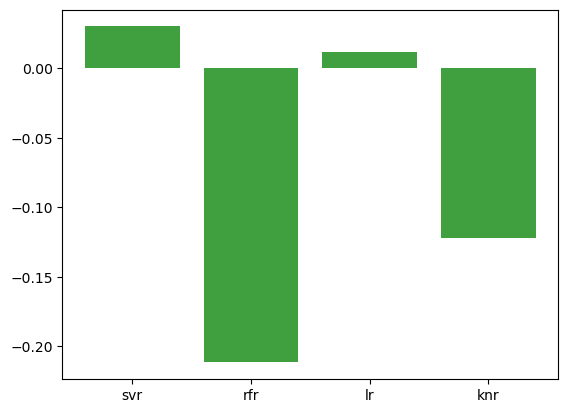

In [41]:
model = outcomes['Model']
r2 = outcomes['r2']
mse = outcomes['mse']

plt.bar(model,r2,alpha=0.75,label = 'R2_score',color = 'green')

In [42]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()

x_train_sc = ssc.fit_transform(x_train)
x_test_sc = ssc.fit_transform(x_test)
sv = SVR()
sv.fit(x_train_sc,y_train)
y_pred = sv.predict(x_test_sc)

features = [[1.606421 ,1.458807 ,1.462109 ,0.600278]]
print(sv.predict(features))
print(y_train.iloc[1])

[5.9114462]
5.815602464927232


In [47]:
from sklearn.ensemble import VotingRegressor

vr = VotingRegressor(estimators=[
    ('svr', SVR(C=1, epsilon=0.1)),
    ('rfr', RandomForestRegressor(n_estimators=200)),
    ('lr', LinearRegression())
])
vr.fit(x_train_sc, y_train)
y_pred = vr.predict(x_test_sc)
print(r2_score(y_test,y_pred))
print(y_test,y_pred)
print( vr.predict([[1.606421 	,1.458807 	,1.462109 	,0.600278]]))

0.0298256916410774
3281     3.900000
13408    5.900000
12988    5.815602
10965    5.900000
3553     6.500000
           ...   
14317    5.900000
6205     5.500000
591      6.500000
2538     5.100000
6953     6.100000
Name: Rating, Length: 2473, dtype: float64 [6.04389335 5.59356513 5.54406738 ... 6.07986708 5.63380376 5.94815838]
[5.8459518]
